# Speech and Language Analysis

This notebook includes two examples:

1. Speech recognition interface from Python to Bing Speech
2. Natural language interface from Python to Microsoft Language Service

This notebook was originally built as an exercise for EdX Course DAT263x.

### Setup

Load the API Key

Bing supports the Python SpeechRecognition package

In [1]:
speechKey = 'a2587ceec3844a729acff9d2d6668db1'
!pip install SpeechRecognition
# !pip install PyAudio-0.2.11-cp37-cp37m-win32.whl
import speech_recognition as sr

### Load a test file

Test a sample file to ensure that it plays

In [2]:
import IPython

!curl http://www.matthewbarr.co.uk/sounds/warp_speed_data.wav -o warp.wav

IPython.display.Audio('warp.wav', autoplay=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 18080  100 18080    0     0  25718      0 --:--:-- --:--:-- --:--:-- 25718


### Call Bing Speech

The following code block imports an audio file into the variable 'r'.

The audio is fed to Bing Speech which returns the transcription.

In [3]:
# Read the audio file
r = sr.Recognizer()
with sr.AudioFile('warp.wav') as source:
    audio = r.record(source)
    
# Alternative code to use mic input (only works in local Jupyter - not in Azure Notebooks)
# r = sr.Recognizer()
# with sr.Microphone() as source:
#     print("I'm listening, please say something...")
#     audio = r.listen(source)

# transcribe speech using the Bing Speech API
try:
    transcription = r.recognize_bing(audio, key=speechKey)
    print("Here's what I heard:")
    print('"' + transcription + '"')
    
except sr.UnknownValueError:
    print("The audio was unclear")
except sr.RequestError as e:
    print (e)
    print("Something went wrong :-(; {0}".format(e))


Here's what I heard:
"Medata warpspeed please."


## Natural Language Recognition

This example takes an audio input of natural English language text and interprets it as a command to turn on or off a light.

The speech engine is the Microsoft Language Understanding Service. I built the light control framework, seeded with some key phrases, and linked their associated intent. Raw inputs are converted into text and then scored on their intent.

Try the following commands:
* *Switch on the light*
* *Turn on the light*
* *Turn off the light*
* *Could you put the light on please?*
* *Darkness falls*

Please enter a command: 
Darkness falls
{'query': 'Darkness falls', 'topScoringIntent': {'intent': 'Light Off', 'score': 0.7766244}, 'intents': [{'intent': 'Light Off', 'score': 0.7766244}, {'intent': 'None', 'score': 0.0641960949}, {'intent': 'Light On', 'score': 0.0353521854}], 'entities': []}


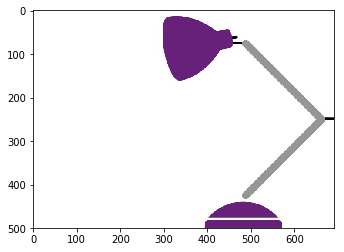

In [4]:
%matplotlib inline
from matplotlib.pyplot import imshow
from PIL import Image
import requests
from io import BytesIO
import json 

# Set up API configuration
endpointUrl = "https://westus.api.cognitive.microsoft.com/luis/v2.0/apps/fb1aa562-b373-4a61-b9f3-5615120695db?subscription-key=20c616a57996421d9b13fb1e3f69e26f&verbose=true&timezoneOffset=-480&q="

# prompt for a command
command = input('Please enter a command: \n')

# Call the LUIS service and get the JSON response
endpoint = endpointUrl + command.replace(" ","+")
response = requests.get(endpoint)
data = json.loads(response.content.decode("UTF-8"))
print (data)

# Identify the top scoring intent
intent = data["topScoringIntent"]["intent"]
if (intent == "Light On"):
    img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/LightOn.jpg'
elif (intent == "Light Off"):
    img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/LightOff.jpg'
else:
    img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Dunno.jpg'

# Get the appropriate image and show it
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
imshow(img)


## Combining Speech and Understanding

This example works similarly to the above but uses natural speech as the input.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  535k  100  535k    0     0  1369k      0 --:--:-- --:--:-- --:--:-- 1369k


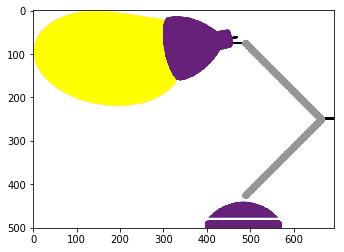

In [5]:
# To read from microphone, requires PyAudio
# r = sr.Recognizer()
# with sr.Microphone() as source:
#    print("I'm listening, please say something...")
#    audio = r.listen(source)

!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/LightOn.wav -o LightOn.wav

# As an altnerative, read an audio file
r = sr.Recognizer()
with sr.AudioFile('LightOn.wav') as source:
     audio = r.record(source)

try:
    # transcribe speech using the Bing Speech API
    transcription = r.recognize_bing(audio, key=speechKey)
    
    # Call the LUIS service and get the JSON response
    endpoint = endpointUrl + transcription.replace(" ","+")
    response = requests.get(endpoint)
    data = json.loads(response.content.decode("UTF-8"))

    # Identify the top scoring intent
    intent = data["topScoringIntent"]["intent"]
    if (intent == "Light On"):
        img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/LightOn.jpg'
    elif (intent == "Light Off"):
        img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/LightOff.jpg'
    else:
        img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Dunno.jpg'

    # Get the appropriate image and show it
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    imshow(img)
    
except sr.UnknownValueError:
    print("Bing Speech could not understand audio")
except sr.RequestError as e:
    print (e)
    print("Could not request results from the Bing Speech service; {0}".format(e))
